In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from skimage import io, feature,transform
import skimage.io
import os
from glob import glob
import re

%matplotlib inline

In [5]:
## read all the folder in list 

folder = os.listdir('data')
folder

['MonkeyHead',
 'Natural',
 'BearHead',
 'CatHead',
 'MouseHead',
 'WolfHead',
 'HumanHead',
 'PigeonHead',
 'CowHead',
 'SheepHead',
 'ChickenHead',
 'TigerHead',
 'EagleHead',
 'PandaHead',
 'RabbitHead',
 'DogHead',
 'DuckHead',
 'LionHead',
 'ElephantHead',
 'DeerHead']

In [67]:
all_path = []
for f in folder:
    all_path+=(glob('./data/{}/*.jpg'.format(f)))

In [68]:
all_path

['./data/MonkeyHead/monkeyfrontal0088.jpg',
 './data/MonkeyHead/monkeyfrontal0063.jpg',
 './data/MonkeyHead/monkeyfrontal0077.jpg',
 './data/MonkeyHead/monkeyfrontal0076.jpg',
 './data/MonkeyHead/monkeyfrontal0062.jpg',
 './data/MonkeyHead/monkeyfrontal0089.jpg',
 './data/MonkeyHead/monkeyfrontal0100.jpg',
 './data/MonkeyHead/monkeyfrontal0048.jpg',
 './data/MonkeyHead/monkeyfrontal0074.jpg',
 './data/MonkeyHead/monkeyfrontal0060.jpg',
 './data/MonkeyHead/monkeyfrontal0061.jpg',
 './data/MonkeyHead/monkeyfrontal0075.jpg',
 './data/MonkeyHead/monkeyfrontal0049.jpg',
 './data/MonkeyHead/monkeyfrontal0071.jpg',
 './data/MonkeyHead/monkeyfrontal0065.jpg',
 './data/MonkeyHead/monkeyfrontal0059.jpg',
 './data/MonkeyHead/monkeyfrontal0058.jpg',
 './data/MonkeyHead/monkeyfrontal0064.jpg',
 './data/MonkeyHead/monkeyfrontal0070.jpg',
 './data/MonkeyHead/monkeyfrontal0099.jpg',
 './data/MonkeyHead/monkeyfrontal0066.jpg',
 './data/MonkeyHead/monkeyfrontal0072.jpg',
 './data/MonkeyHead/monkeyfronta

In [60]:
## read all images and labels

In [69]:
img_all = skimage.io.ImageCollection(all_path)

In [79]:
img_all.files

['./data/BearHead/bearfrontal0001.jpg',
 './data/BearHead/bearfrontal0002.jpg',
 './data/BearHead/bearfrontal0003.jpg',
 './data/BearHead/bearfrontal0004.jpg',
 './data/BearHead/bearfrontal0005.jpg',
 './data/BearHead/bearfrontal0006.jpg',
 './data/BearHead/bearfrontal0007.jpg',
 './data/BearHead/bearfrontal0008.jpg',
 './data/BearHead/bearfrontal0009.jpg',
 './data/BearHead/bearfrontal0010.jpg',
 './data/BearHead/bearfrontal0011.jpg',
 './data/BearHead/bearfrontal0012.jpg',
 './data/BearHead/bearfrontal0013.jpg',
 './data/BearHead/bearfrontal0014.jpg',
 './data/BearHead/bearfrontal0015.jpg',
 './data/BearHead/bearfrontal0016.jpg',
 './data/BearHead/bearfrontal0017.jpg',
 './data/BearHead/bearfrontal0018.jpg',
 './data/BearHead/bearfrontal0019.jpg',
 './data/BearHead/bearfrontal0020.jpg',
 './data/BearHead/bearfrontal0021.jpg',
 './data/BearHead/bearfrontal0022.jpg',
 './data/BearHead/bearfrontal0023.jpg',
 './data/BearHead/bearfrontal0024.jpg',
 './data/BearHead/bearfrontal0025.jpg',


In [70]:
len(img_all)

2023

In [92]:
## labeling
## extract the folder_name 
def extract_label(path):
    try:
        label=re.search(r'./data/(.*)Head/',path).group(1)
    except:
        label=re.search(r'./data/(.*)/',path).group(1)

    return label.lower()

In [93]:
extract_label('./data/BearHead/bearfrontal0001.jpg')

'bear'

In [94]:
labels = list(map(extract_label,img_all.files))

In [97]:
# labels

In [96]:
len(labels)

2023

In [98]:
img_all[0].shape

(80, 80, 3)

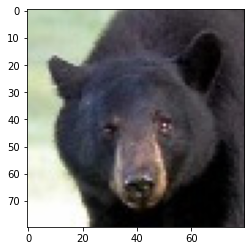

In [99]:
plt.imshow(img_all[0])

In [102]:
# convert collection into array
def buffer(io):
    return io

In [104]:
img_all_arr=np.array(list(map(buffer,img_all)))

In [107]:
img_all_arr.shape

(2023, 80, 80, 3)

In [108]:
data = dict()

data['description']='There are 20 classes of images where each image are of 80x80 dim and there are total of 2023 instances'
data['data']= img_all_arr
data['labels']=labels
data['classes']=set(labels)


In [109]:
data

{'description': 'There are 20 classes of images where each image are of 80x80 dim and there are total of 2023 instances',
 'data': array([[[[196, 214, 188],
          [196, 214, 188],
          [196, 214, 188],
          ...,
          [ 81,  76,  80],
          [ 81,  76,  80],
          [ 69,  64,  68]],
 
         [[196, 214, 188],
          [196, 214, 188],
          [196, 215, 187],
          ...,
          [ 82,  77,  81],
          [ 83,  78,  82],
          [ 77,  72,  76]],
 
         [[193, 213, 185],
          [194, 214, 186],
          [194, 214, 186],
          ...,
          [ 82,  77,  81],
          [ 81,  76,  80],
          [ 78,  73,  77]],
 
         ...,
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 70,  65,  69],
          [ 65,  60,  64],
          [ 62,  57,  63]],
 
         [[254, 254, 254],
          [254, 254, 254],
          [254, 254, 254],
          ...,
          [ 66,  61,  65],
          [

In [110]:
## save in pickle

In [111]:
import pickle
import collections

In [112]:
pickle.dump(data,open('data_animals.pickle','wb'))

In [113]:
count_values = collections.Counter(data['labels'])

In [114]:
count_values

Counter({'bear': 101,
         'cat': 159,
         'chicken': 100,
         'cow': 101,
         'deer': 101,
         'dog': 132,
         'duck': 102,
         'eagle': 96,
         'elephant': 100,
         'human': 100,
         'lion': 97,
         'monkey': 100,
         'mouse': 100,
         'natural': 8,
         'panda': 116,
         'pigeon': 98,
         'rabbit': 100,
         'sheep': 100,
         'tiger': 112,
         'wolf': 100})

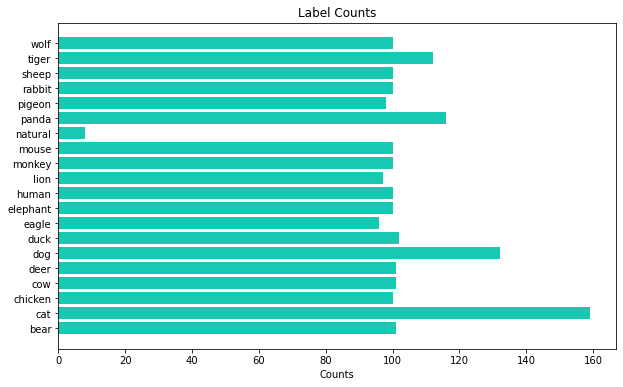

In [124]:
y = list(count_values.keys())
values = count_values.values()

plt.figure(figsize=(10,6))
plt.barh(y=y,width=values,color='#17C9B3')

plt.title('Label Counts')
plt.xlabel('Counts')
plt.show()

In [126]:
data['data'].shape

(2023, 80, 80, 3)

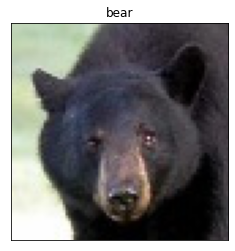

In [133]:
plt.imshow(data['data'][0])
plt.xticks([]), plt.yticks([])
plt.title(data['labels'][0])
plt.show()

In [145]:
plt.figure(figsize=(12,8))
for i,c in enumerate(data['classes']):
    print(c)
#     index=data['labels'].index(c)
#     img = data['data'][index]
# #     plt.subplot(3,7,i+1)
#     plt.imshow(img)
#     plt.xticks([]),plt.yticks([])
#     plt.title(c)
#     plt.show()

rabbit
tiger
mouse
natural
dog
sheep
eagle
human
monkey
pigeon
elephant
lion
bear
wolf
cat
panda
deer
cow
duck
chicken


<Figure size 864x576 with 0 Axes>